<div style="background-image: url('/workspace/pokemon-ad-pj/banieres.jpg'); background-size: contain; background-position: center center; height: 100px;">
</div>


<div style="padding: 10px; border: 5px double black; border-radius: 5px;">
  <h3 style="color: #2E75B6;">Sommaire</h3>
  <ul style="list-style-type: none; padding-left: 0;">
    <li style="margin-bottom: 5px;"><a href="#modules" style="color: #2E75B6; font-weight: bold; text-decoration: none;">Modules nécessaires</a></li>
    <li style="margin-bottom: 5px;"><a href="#problematique-1" style="color: #2E75B6; font-weight: bold; text-decoration: none;">Problématique 1: Combien y a-t-il de pokémon par génération ?</a></li>
    <li style="margin-bottom: 5px;"><a href="#problematique-2" style="color: #2E75B6; font-weight: bold; text-decoration: none;">Problématique 2: Combien y a-t-il de pokémon de chaque élément par génération ?</a></li>
    <li style="margin-bottom: 5px;"><a href="#problematique-3" style="color: #2E75B6; font-weight: bold; text-decoration: none;">Problématique 3: Combien y a-t-il de pokémon à double éléments par génération ?</a></li>
    <li style="margin-bottom: 5px;"><a href="#problematique-4" style="color: #2E75B6; font-weight: bold; text-decoration: none;">Problématique 4: Quels sont les pokémon légendaires de chaque génération ?</a></li>
  </ul>
</div>


In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

### <span style="color: #6e58ff"> Définitions de numpy, pandas et matplotlib :</style>
<span style="color: #d1a9f5"> 

- NumPy : NumPy est une bibliothèque Python destinée à la manipulation de tableaux multidimensionnels et de matrices, ainsi qu'à leur traitement mathématique. Elle est très utile pour effectuer des opérations mathématiques sur des tableaux de données, tels que des calculs statistiques, des opérations de vecteurs et matrices, et des fonctions d'algèbre linéaire.

- Pandas : Pandas est une bibliothèque Python destinée à la manipulation de données structurées et de séries chronologiques. Elle offre des structures de données flexibles pour travailler avec des données de type tableau et permet de manipuler et analyser des données de manière efficace. Elle est utilisée pour des tâches telles que l'importation et la préparation de données, le filtrage et la sélection de données, le calcul de statistiques descriptives et la visualisation de données.

- Matplotlib : Matplotlib est une bibliothèque Python destinée à la visualisation de données. Elle permet de créer des graphiques, des diagrammes et des visualisations de données de manière flexible et personnalisable. Matplotlib offre une large gamme d'options pour créer des graphiques en deux dimensions et en trois dimensions, ainsi que des graphiques interactifs. Elle est utilisée pour représenter des données sous forme graphique et pour créer des illustrations pour la communication scientifique.</span>


### <span id = "module" style="color: #ff5733">Modules nécessaires</span> <span style="text-shadow: 2px 2px #888888">:</span>

### <span id="problematique-1" style="color: #6e58ff">Problématique 1: Combien y a-t-il de pokemon par generation ?</span> <span style="text-shadow: 1px 1px #888888">-</span>
#### <span style="color: #d1a9f5">Première méthode</span> <span style="text-shadow: 1px 1px #888888">:</span>


In [ ]:
import numpy as np

# Ouvrir le fichier csv
pokemon_data = np.genfromtxt("pokemon.csv", delimiter=",", dtype=str)

# Sélectionner les colonnes de génération et l'id de chaque Pokémon

pokemon_id = pokemon_data[:,0].astype(int)
generation = pokemon_data[:,11].astype(int)

#On définit chaque compteur pour chaque génération
generation_list = np.zeros((6),dtype=int)
compteur_list = np.zeros((6), dtype=int)

#Parcourir l'entièreté des Pokémons du fichier csv
for i in range(len(generation)):
    #Si un Pokémon possède plusieurs formes (et donc apparait plusieurs fois dans la colonne id).
    if pokemon_id[i]!=pokemon_id[i-1]:
        if generation[i]==1:
            compteur_list[0]+=1
        if generation[i]==2:
            compteur_list[1]+=1
        if generation[i]==3:
            compteur_list[2]+=1
        if generation[i]==4:
            compteur_list[3]+=1
        if generation[i]==5:
            compteur_list[4]+=1
        if generation[i]==6:
            compteur_list[5]+=1

a=0
for i in range(6):
    a+=1
    generation_list[i]+=a      
        
# Afficher les résultats

print("Génération :        ",generation_list)

print("Nombre de pokémon : ",compteur_list)


#### <span style="color: #d1a9f5">Seconde méthode</span> <span style="text-shadow: 1px 1px #888888">:</span>


In [ ]:
import pandas as pd

# Charger les données à partir du fichier CSV en utilisant Pandas
data = pd.read_csv('pokemon.csv')

# Compter le nombre de Pokémon par génération en utilisant la méthode value_counts()
generation_counts = data['Generation'].value_counts()

# Trier les compteurs de génération par ordre croissant de génération
generation_counts = generation_counts.sort_index()

# Afficher le nombre de Pokémon par génération
for i, count in enumerate(generation_counts):
  print("Generation {}: {} Pokémon".format(i + 1, count))

#### <span style="color: #d1a9f5">Troisieme méthode</span> <span style="text-shadow: 1px 1px #888888">:</span>


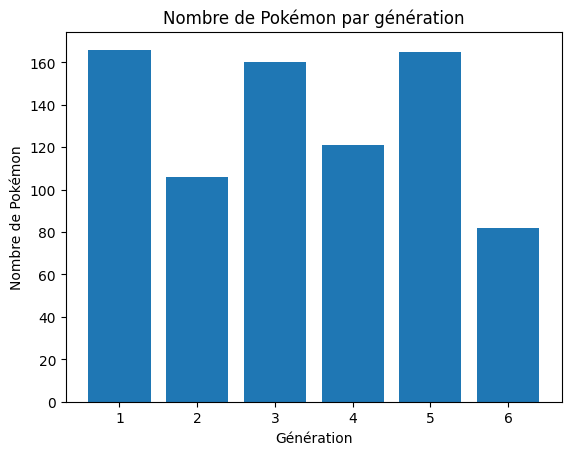

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ouverture du fichier CSV
df = pd.read_csv('pokemon.csv')

# Comptage des Pokémon par génération
pokemon_count_by_generation = df.groupby('Generation')['Name'].count()

# Création d'un graphique à barres
plt.bar(pokemon_count_by_generation.index, pokemon_count_by_generation.values)

# Configuration du graphique
plt.title("Nombre de Pokémon par génération")
plt.xlabel("Génération")
plt.ylabel("Nombre de Pokémon")

# Affichage du graphique
plt.show()


### <span id="problematique-2" style="color: #6e58ff">Problématique 2: Combien y a-t-il de pokemon de chaques elements par generation ?</span> <span style="text-shadow: 1px 1px #888888">-</span>

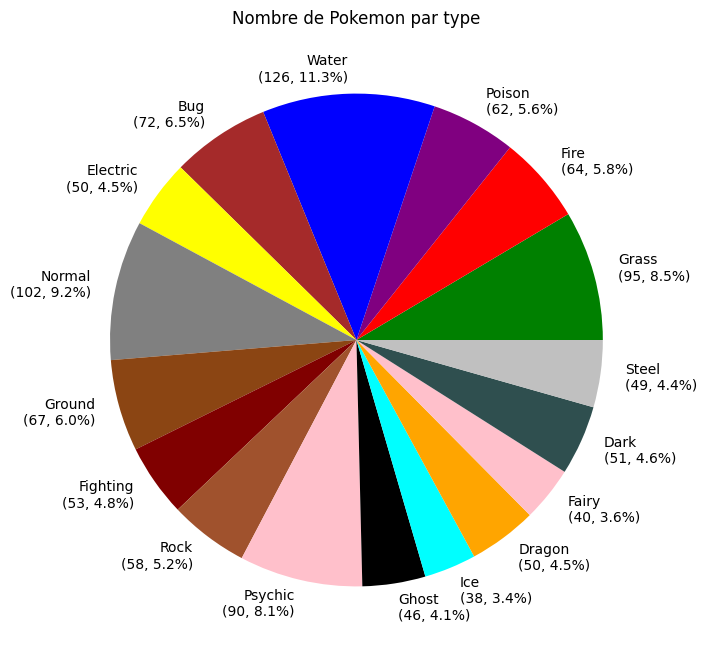

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Ouvrir le fichier csv
pokemon_data = np.genfromtxt("pokemon.csv", delimiter=",", dtype=str)

# Sélectionner les colonnes de type 1, de type 2, de génération et de nom
pokemon_type_1 = pokemon_data[:,2]
pokemon_type_2 = pokemon_data[:,3]
pokemon_generation = pokemon_data[:,11].astype(int)

# Les types de pokemon possibles et leurs couleurs associées
pokemon_types = np.array(['Grass', 'Fire', 'Poison', 'Water', 'Bug', 'Electric', 
                  'Normal', 'Ground', 'Fighting', 'Rock', 'Psychic', 'Ghost', 
                  'Ice', 'Dragon', 'Fairy', 'Dark', 'Steel'])
pokemon_colors = np.array(['green', 'red', 'purple', 'blue', 'brown', 'yellow', 
                   'grey', 'saddlebrown', 'maroon', 'sienna', 'pink', 'black', 
                   'cyan', 'orange', 'pink', 'darkslategrey', 'silver'])

# Initialiser un tableau de comptage pour chaque type de pokemon dans chaque génération
pokemon_type_counts = np.zeros((17, 6), dtype=int)

# Boucle sur chaque type de pokemon
for i in range(17):
    current_type = pokemon_types[i]
    
    # Boucle sur chaque pokemon pour compter le nombre de fois où un type apparaît dans une génération
    for j in range(len(pokemon_type_1)):
        if pokemon_type_1[j] == current_type or pokemon_type_2[j] == current_type:
            generation = pokemon_generation[j] - 1
            pokemon_type_counts[i, generation] += 1
        
# Calculer les totaux et les pourcentages de chaque type de pokemon
total_counts = pokemon_type_counts.sum(axis=1)
percentages = total_counts / sum(total_counts) * 100

# Créer le graphique
fig, ax = plt.subplots(figsize=(8,8))

# Tracer les barres circulaires avec les pourcentages
labels = [f"{t}\n({c}, {p:.1f}%)" for t, c, p in zip(pokemon_types, total_counts, percentages)]
ax.pie(total_counts, labels=labels, colors=pokemon_colors)

# Définir le titre
ax.set_title('Nombre de Pokemon par type')

# Afficher le graphique
plt.show()


### <span id="problematique-3" style="color: #6e58ff">Problématique 3: Combien y a-t-il de pokemon a double élements par generation ?</span> <span style="text-shadow: 1px 1px #888888">-</span>
#### <span style="color: #d1a9f5">Première méthode</span> <span style="text-shadow: 1px 1px #888888">:</span>

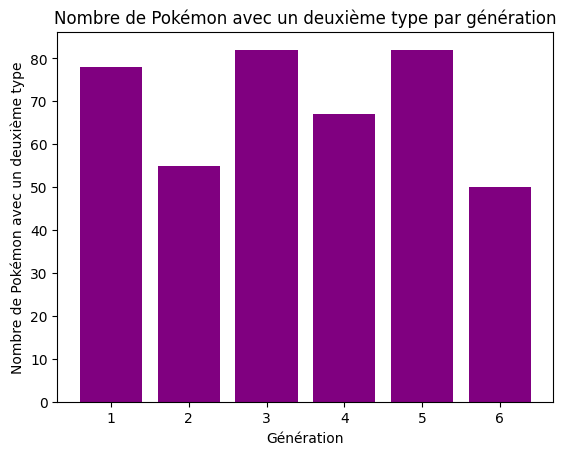

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV en utilisant Pandas
data = pd.read_csv('pokemon.csv')

# Définir les 6 générations
generations = range(1, 7)

# Initialiser une liste pour stocker les nombres de Pokémon ayant un deuxième type pour chaque génération
count_list = []

# Boucle pour chaque génération
for generation in generations:
  # Filtrer les données pour n'inclure que les Pokémon de la génération en cours
  generation_pokemon = data[data['Generation'] == generation]
  
  # Compter le nombre de Pokémon avec un type 1 et un type 2 pour la génération en cours
  count = len(generation_pokemon[generation_pokemon['Type 2'].notnull()])
  
  # Ajouter le nombre de Pokémon à la liste
  count_list.append(count)

# Créer un graphique en barres du nombre de Pokémon ayant un deuxième type pour chaque génération
plt.bar(generations, count_list, align='center', color='purple')
plt.xticks(generations)
plt.xlabel('Génération')
plt.ylabel('Nombre de Pokémon avec un deuxième type')
plt.title('Nombre de Pokémon avec un deuxième type par génération')

# Afficher le graphique
plt.show()


#### <span style="color: #d1a9f5">Seconde méthode</span> <span style="text-shadow: 1px 1px #888888">:</span>

In [14]:
import pandas as pd

# Charger les données à partir du fichier CSV en utilisant Pandas
data = pd.read_csv('pokemon.csv')

# Définir les 6 générations
generations = range(1, 7)

# Boucle pour chaque génération
for generation in generations:
  # Filtrer les données pour n'inclure que les Pokémon de la génération en cours
  generation_pokemon = data[data['Generation'] == generation]
  
  # Compter le nombre de Pokémon avec un type 1 et un type 2 pour la génération en cours
  count = generation_pokemon.groupby(['Type 1', 'Type 2']).size().reset_index(name='counts')
  
  # Afficher les résultats pour la génération en cours
  print("Génération {}:".format(generation))
  display(count)

Génération 1:


,Type 1,Type 2,counts
0,Bug,Flying,3
1,Bug,Grass,2
2,Bug,Poison,6
3,Dragon,Flying,1
4,Electric,Flying,1
5,Electric,Steel,2
6,Fire,Dragon,1
7,Fire,Flying,3
8,Ghost,Poison,4
9,Grass,Poison,10


Génération 2:


,Type 1,Type 2,counts
0,Bug,Fighting,2
1,Bug,Flying,3
2,Bug,Poison,2
3,Bug,Rock,1
4,Bug,Steel,3
5,Dark,Fire,3
6,Dark,Flying,1
7,Dark,Ice,1
8,Electric,Dragon,1
9,Fairy,Flying,1


Génération 3:


,Type 1,Type 2,counts
0,Bug,Flying,3
1,Bug,Ghost,1
2,Bug,Ground,1
3,Bug,Poison,1
4,Bug,Water,1
5,Dark,Ghost,2
6,Dragon,Fairy,1
7,Dragon,Flying,5
8,Dragon,Psychic,4
9,Fighting,Psychic,3


Génération 4:


,Type 1,Type 2,counts
0,Bug,Flying,4
1,Bug,Grass,1
2,Bug,Ground,1
3,Bug,Steel,1
4,Dark,Flying,1
5,Dark,Ice,1
6,Dragon,Ground,4
7,Electric,Fire,1
8,Electric,Flying,1
9,Electric,Ghost,1


Génération 5:


,Type 1,Type 2,counts
0,Bug,Electric,2
1,Bug,Fire,2
2,Bug,Grass,3
3,Bug,Poison,3
4,Bug,Rock,2
5,Bug,Steel,3
6,Dark,Dragon,3
7,Dark,Fighting,2
8,Dark,Flying,2
9,Dark,Steel,2


Génération 6:


,Type 1,Type 2,counts
0,Bug,Flying,1
1,Dark,Flying,1
2,Dark,Psychic,2
3,Dragon,Ground,1
4,Electric,Fairy,1
5,Electric,Normal,2
6,Fighting,Dark,1
7,Fighting,Flying,1
8,Fire,Flying,2
9,Fire,Normal,2


### <span id="problematique-4" style="color: #6e58ff">Problématique 4: Quels sont les pokemons légendaire de chaque generation ?</span> <span style="text-shadow: 1px 1px #888888">-</span>

In [12]:
import pandas as pd

# Charger les données à partir du fichier CSV en utilisant Pandas
data = pd.read_csv('pokemon.csv')

# Filtrer les données pour n'inclure que les Pokémon légendaires
legendary_pokemon = data[data['Legendary'] == True]

# Afficher les Pokémon légendaires par génération
for i in range(1, 7):
  generation = legendary_pokemon[legendary_pokemon['Generation'] == i]
  print("Génération {}:".format(i))
  display(generation)


Génération 1:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


Génération 2:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


Génération 3:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
416,379,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
423,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


Génération 4:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
537,480,Uxie,Psychic,NaN,580,75,75,130,75,130,95,4,True
538,481,Mesprit,Psychic,NaN,580,80,105,105,105,105,80,4,True
539,482,Azelf,Psychic,NaN,580,75,125,70,125,70,115,4,True
540,483,Dialga,Steel,Dragon,680,100,120,120,150,100,90,4,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
542,485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
543,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
545,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True


Génération 5:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
553,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True
699,638,Cobalion,Steel,Fighting,580,91,90,129,90,72,108,5,True
700,639,Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True
701,640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
702,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
703,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
704,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
705,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True


Génération 6:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True
